## Image Classification with Convolutional Neural Network (CIFAR-10)

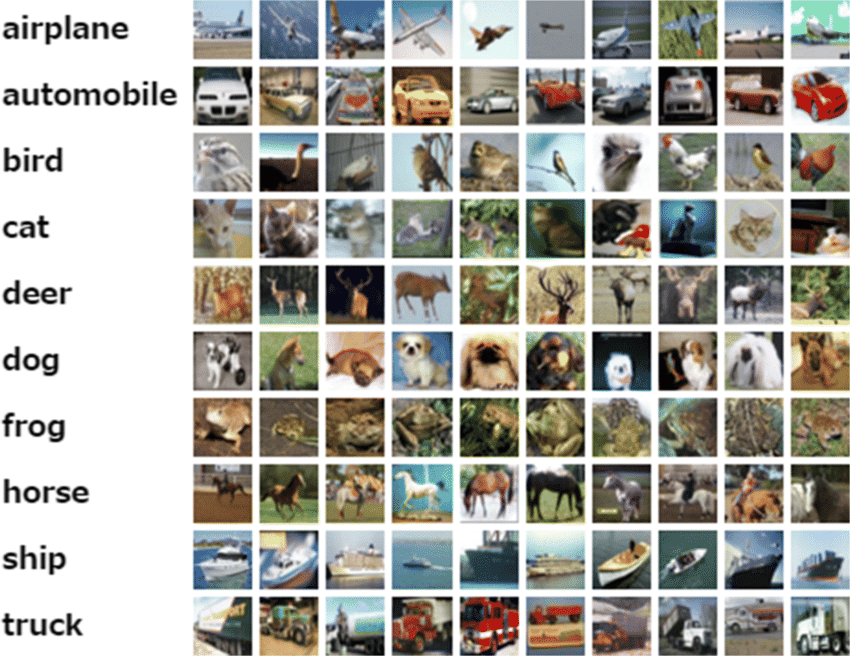

### Dataset contains 60,000 images as 32x32 pixels in 3 channels

In [ ]:
# IMPORTING TENSORFLOW
import tensorflow as tf

In [ ]:
# loading the inbuilt cifar-10 dataset
cifar10 = tf.keras.datasets.cifar10

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
print(x_train.shape, y_train.shape)  # 32X32 pixels (50,000 in training)

(50000, 32, 32, 3) (50000, 1)


In [ ]:
print(x_test.shape, y_test.shape)  # 32x32 pixels (10,000 in testing)

(10000, 32, 32, 3) (10000, 1)


In [ ]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

## Plotting the images

[4]


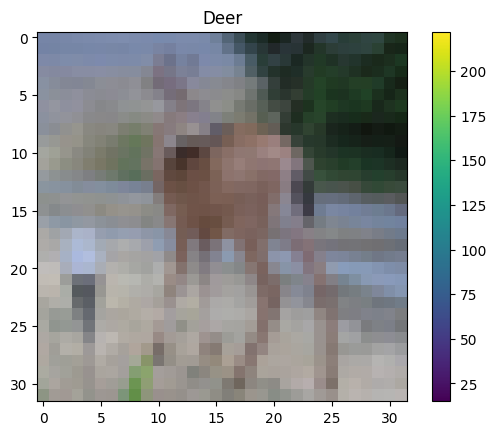

In [ ]:
image_index = 100

image = x_test[image_index]
label = y_test[image_index]

category_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

print(label)
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(image)
plt.title(category_names[label[0]])
plt.colorbar()
plt.grid(False)
plt.show()

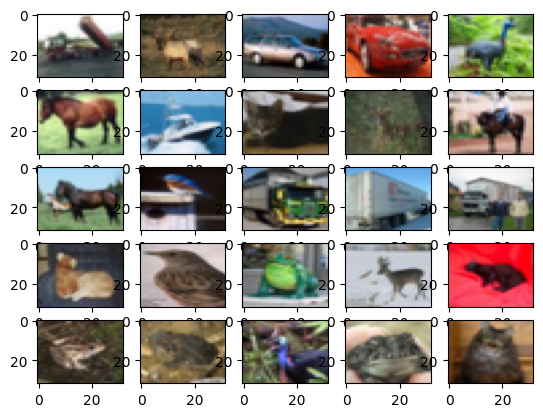

In [ ]:
fig, ax = plt.subplots(5, 5)
k = 2
for i in range(5):
	for j in range(5):
		ax[i][j].imshow(x_train[k], aspect='auto')
		k += 1
plt.show()

## Normalization

### Normalize the pixels values in range (0 to 1)

In [ ]:
# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()

In [ ]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

## Building CNN Model

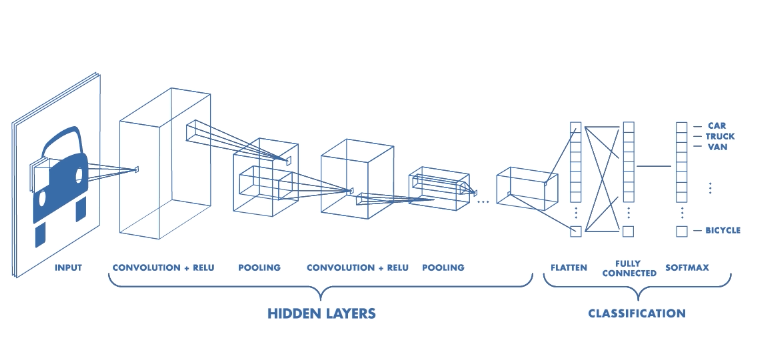

### LIBRARIES

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

### INPUT LAYER

In [ ]:
x_train[0].shape

(32, 32, 3)

In [ ]:
input = Input(shape=x_train[0].shape)

### CONVOLUTIONAL LAYER

In [ ]:
x = Conv2D(32, (3, 3),                   # 32 filters and size of filter is 3x3
           activation='relu',            # relu (-1 to 0)
           padding='same')(input)        # padding (valid and same) (output feature map is same as input map)


x = BatchNormalization()(x)              # normalizing the output for new input


x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)

### MAX-POOLING LAYER

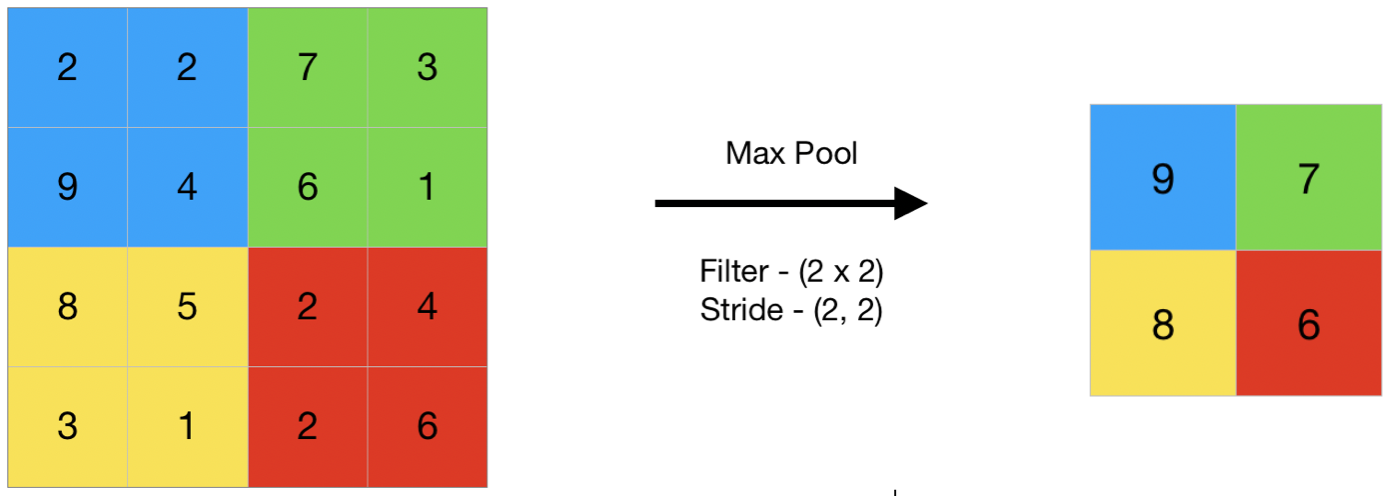

In [ ]:
x = MaxPooling2D((2, 2))(x)     # POOLING LAYER HAS SIZE OF 2x2

### Again - Convolutional Layer

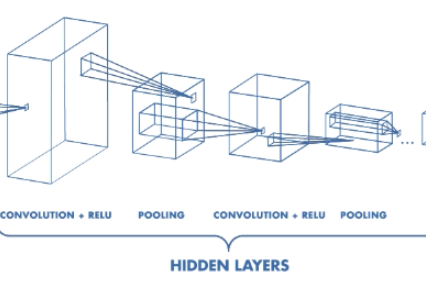

In [ ]:
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)      # filters 64
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)


x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)     # filters 128
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

### Flatten the output for dense layers

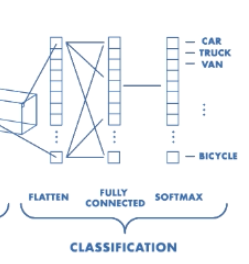

In [ ]:
x = Flatten()(x)
x = Dropout(0.2)(x)     # dropping certain neurons

### Adding one Hidden Layer

In [ ]:
# Hidden layer
x = Dense(1024, activation='relu')(x)     ## 1024 neurons in hidden layer
x = Dropout(0.2)(x)

### Output layer

In [ ]:
x = Dense(len(set(y_train)), activation='softmax')(x)   # softmax for multiclass classification (probabilities)

In [ ]:
model = Model(input, x)

### MODEL SUMMARY

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0     

### MODEL COMPILE

In [ ]:
model.compile(optimizer='adam',   ### reducing the loss
			loss='sparse_categorical_crossentropy',  ## for categorical
			metrics=['accuracy'])

### MODEL TRAINING

Batch Size: 32
Train Image: 50,000
Steps_per_epoch = 50,000/32 = 1563

In [ ]:
cnn_model = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=20)

Epoch 1/20
1563/1563 [==============================] - 23s 9ms/step - loss: 1.2866 - accuracy: 0.5566 - val_loss: 1.7576 - val_accuracy: 0.5121
Epoch 2/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8420 - accuracy: 0.7086 - val_loss: 0.8743 - val_accuracy: 0.7025
Epoch 3/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6915 - accuracy: 0.7598 - val_loss: 0.7009 - val_accuracy: 0.7621
Epoch 4/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.5894 - accuracy: 0.7997 - val_loss: 0.7199 - val_accuracy: 0.7648
Epoch 5/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5012 - accuracy: 0.8271 - val_loss: 0.6985 - val_accuracy: 0.7721
Epoch 6/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.4271 - accuracy: 0.8524 - val_loss: 0.6077 - val_accuracy: 0.8025
Epoch 7/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.3591 - accuracy: 0.8745 - val_loss: 0.6433 - val_ac

### Model Evaluation

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")
print(f"Test loss: {test_loss}")

313/313 [==============================] - 1s 4ms/step - loss: 0.7573 - accuracy: 0.8370
Test Accuracy: 0.8370000123977661
Test loss: 0.7573283910751343


## Saving the model

In [ ]:
cnn_model.model.save("cnn_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Visualizing (loss and accuracy)

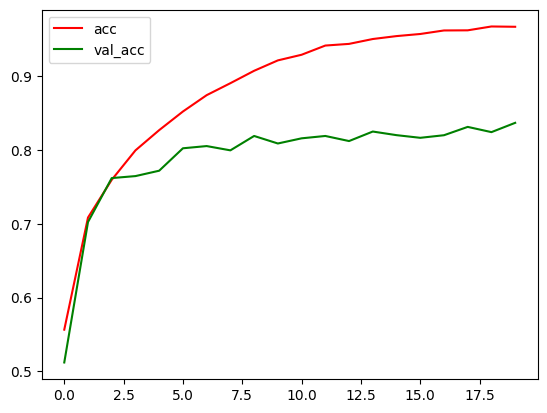

In [ ]:
# Plot accuracy per iteration
plt.plot(cnn_model.history['accuracy'], label='acc', color='red')
plt.plot(cnn_model.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

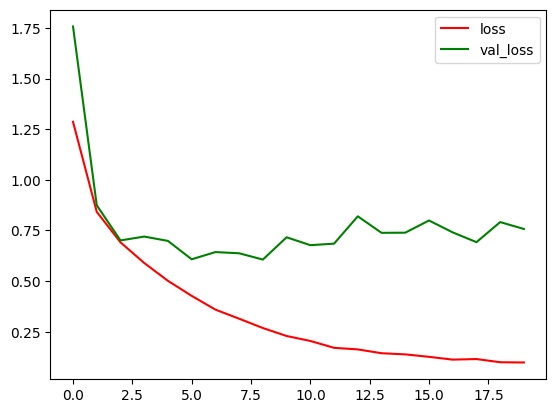

In [ ]:
# Plot accuracy per iteration
plt.plot(cnn_model.history['loss'], label='loss', color='red')
plt.plot(cnn_model.history['val_loss'], label='val_loss', color='green')
plt.legend()

## Predicting

In [ ]:
import numpy as np
labels = '''airplane automobile bird cat deerdog frog horseship truck'''.split()

image_number = 70

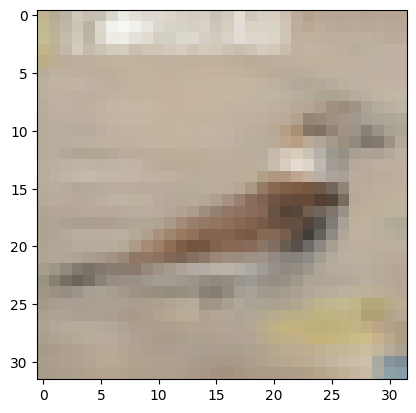

In [ ]:
plt.imshow(x_test[image_number])
n = np.array(x_test[image_number])

In [ ]:
# reshape it
p = n.reshape(1, 32, 32, 3)

In [ ]:
predicted_label = labels[model.predict(p).argmax()]
original_label = labels[y_test[image_number]]

print("Original label: {}".format(original_label))
print("Predicted label: {}".format(predicted_label))

1/1 [==============================] - 0s 19ms/step
Original label: bird
Predicted label: bird
